#Predicting Medical Price using Linear Regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('/content/Medical Price Dataset.csv')
print("Imported Succesfully")

Imported Succesfully


In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##preparing dataset for training and testing the model

In [5]:
#separating the charges(target) from the dataset
y = data['charges']
data = data.drop('charges',axis=1)
data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
data.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


##Label Encoding (Transforming the categorical data)

In [8]:
cat_cols = [i for i in data.columns if data[i].dtype=='object']
print(data[cat_cols].nunique())

print('\n',"Printing the unique values in the categorical set")
for i in cat_cols:
  print(i, data[i].unique())

sex       2
smoker    2
region    4
dtype: int64

 Printing the unique values in the categorical set
sex ['female' 'male']
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
#using panda categorical codes to transform the categorical data into numeric
data[cat_cols] = data[cat_cols].astype('category')
for i in cat_cols:
  data[i] = data[i].cat.codes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int8   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int8   
 5   region    1338 non-null   int8   
dtypes: float64(1), int64(2), int8(3)
memory usage: 35.4 KB


In [10]:
# converting datatype of every feature into float64
data[data.columns] = data[data.columns].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
dtypes: float64(6)
memory usage: 62.8 KB


In [11]:
data.describe()

,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


##Data visualization

In [12]:
#correlation matrix
m = data.copy()
m['charges'] = y
m.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


Smoker data is highly correlated with the charges

<Axes: title={'center': 'charges vs age'}, xlabel='age', ylabel='charges'>

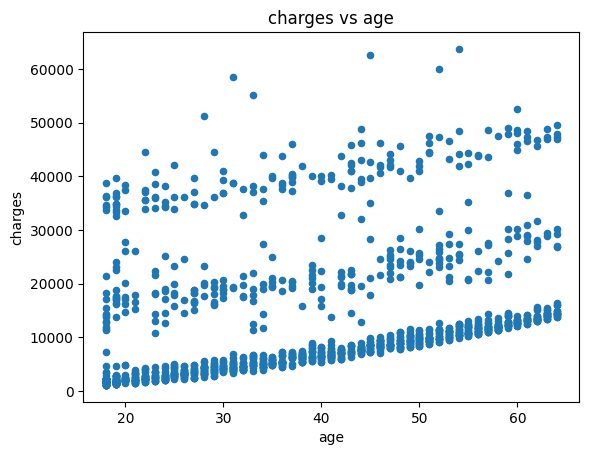

In [13]:
m.plot(kind='scatter',x='age',y='charges',title='charges vs age')

<Axes: title={'center': 'charges vs region'}, xlabel='region', ylabel='charges'>

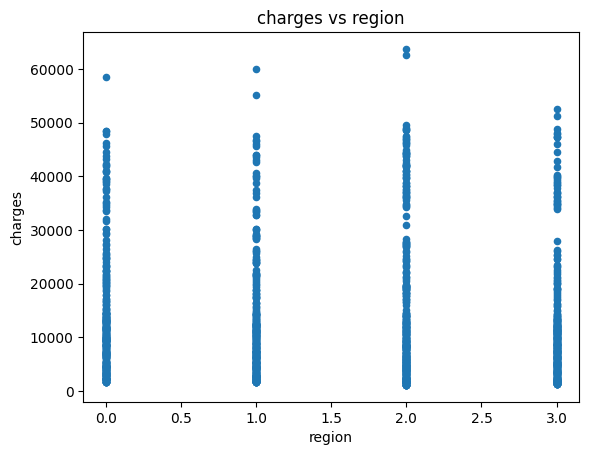

In [14]:
m.plot(kind='scatter', x='region', y='charges', title='charges vs region')

##Feature Scaling

In [15]:
#Normalizing age and BMI using Min-Max Normalization
for i in ['age','bmi']:
  a=min(data[i])
  b=max(data[i])
  c=b-a
  for j,k in enumerate(data[i]):
    data.loc[j,i] = ((k-a)/c)
data.describe()

,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395572,1.094918,0.204783,1.515695
std,0.305434,0.500160,0.164062,1.205493,0.403694,1.104885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.000000,0.000000,1.000000
50%,0.456522,1.000000,0.388485,1.000000,0.000000,2.000000
75%,0.717391,1.000000,0.504002,2.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000,1.000000,3.000000


##Dividing Data into test and train set

Taking approx 84% data for training and rest for testing the model

In [16]:
#Dividing the data into training set and test set
x_train, x_test = data.iloc[:1100], data.iloc[1100:]
y_train, y_test = y.iloc[:1100], y.iloc[1100:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train.head()

(1100, 6) (238, 6) (1100,) (238,)


,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.321227,0.0,1.0,3.0
1,0.000000,1.0,0.479150,1.0,0.0,2.0
2,0.217391,1.0,0.458434,3.0,0.0,2.0
3,0.326087,1.0,0.181464,0.0,0.0,1.0
4,0.304348,1.0,0.347592,0.0,0.0,1.0


In [17]:
class Linear_reg:
  def __init__(self):
    #randomly initializing theta
    #since our data set contains 6 features
    #so number_of_constants(theta) = 7
    self.theta = np.random.random(7)
    self.theta = (self.theta).reshape(1,7)

  def train_model(self, x_train, y_train, a=0.05, n_iterator=800):
    #changing panda DataFrame to numpy ndarrays
    x_train = x_train.to_numpy()
    y_train = y_train.to_numpy()

    x_train =np.concatenate((np.ones((len(x_train),1),dtype=np.float64), x_train), axis=1)
    #adding new column containing 1's to x_train

    # n_iterator is the number of times we want to run gradient descent
    check_cost=[] # stores the cost function for each iteration

    # a is the learning rate

    for i in range(n_iterator):
      y_pred = (self.theta * x_train).sum(axis=1)
      #y_pred is a numpy array cotaining predicted values(charges)
      grad = y_pred-y_train
      check_cost.append(0.5/len(x_train)*((grad*grad).sum()))

      #adjusting the values of theta
      d = np.dot(grad,x_train)
      self.theta = self.theta - a/(len(x_train))*d
      # Here d is partial derivative of cost function w.r.t to theta


    #checking that the cost decreases with each iteration
    plt.scatter(list(range(n_iterator)), check_cost)
    plt.xlabel='Number of iterations'
    plt.ylabel = 'cost'
    return None


  def predict(self, x_test):
    #print(self.theta.shape)
    x_test = x_test.to_numpy()
    x_test = np.concatenate((np.ones((len(x_test),1), dtype = 'float64'), x_test), axis = 1)
    pred = self.theta * x_test
    y= pred.sum(axis=1)
    #y = y.reshape(-1,1)
    return y


  def mean_absolute_error(self, y, y_pred):
    if(len(y)==len(y_pred)):
      mae = 1/len(y)*((abs(y-y_pred)).sum())
      return mae
    else:
      print("dimensions are not equal")
      return None


##Training the Machine Learning Model

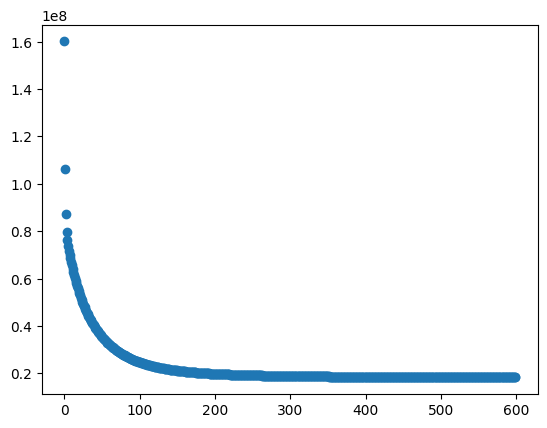

In [18]:
model = Linear_reg()
model.train_model(x_train, y_train,0.07,600)

##Predicting the values

In [19]:
pred = model.predict(x_test)
print(model.mean_absolute_error(y_test,pred))


4241.145714946986
